<a href="https://colab.research.google.com/github/ms624atyale/Scratch/blob/main/Text_Analysis1_ModifiedfromMK316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐹 🐾 [Text Corpus <font size='1.8'>코퍼스/말뭉치</font>](https://en.wikipedia.org/wiki/Text_corpus)  
- In linguistics, a corpus (plural corpora) or text corpus is a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

- The **corpus-toolkit** package grew out of courses in corpus linguistics and learner corpus research. The toolkit attempts to balance simplicity of use, broad application, and scalability. Common corpus analyses such as the <font color = 'pink'>_calculation of word and n-gram frequency and range, keyness, and collocation_</font> are included. In addition, more advanced analyses such as the identification of <font color = 'pink'>_dependency bigrams (e.g., verb-direct object combinations) and their frequency, range, and strength of association_</font>  are also included.(https://pypi.org/project/corpus-toolkit/)

Some conditions should be fulfilled if you want to conduct corpus-related analysis. 

>1. Read and write a file using an operating system package.
>2. 🆘 import the **[os](https://docs.python.org/3/library/os.html)** module.


>3. Text files you want to analyze (e.g., url(uniform resource locator) with html document, text files under the Files dicrectory of Google Colab).
>4. Text ➡️ Words: **Tokenization**
>5. Words with the conjugation, inflection, derivation process ↔️ Words sorted by grouping inflected or variant forms of the same word (i.e., **lemmatization**)
>6. POS (part of speech (e.g., word-grammatical category pairs))
>7. 🆘 Install **corpus-toolkit** and **nltk**(natural language tool kit) packages.
 


In [1]:
#@markdown 📌 Download the os module 
import os

In [2]:
#@markdown 📌 Make a new working directory as "txtdata". 📎 <Module name: os> <function: mkdir>

os.mkdir("txtdata")

In [ ]:
#@markdown 📌 Download the corpus-toolkit package
!pip install corpus-toolkit

In [4]:
#@markdown 📌 Get working directory. <codeline: print working directory>
%pwd

'/content'

In [11]:
#@markdown 📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable> 
url="https://github.com/ms624atyale/Data_Misc/blob/main/crime_punishment.txt"

os.system("curl " + url + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.  

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

#@markdown 📎 When you see txtdata.txt under the Files directory, move it under the txtdata folder you've created by drag & drop.

In [13]:
#@markdown 📌 i) Tokenize your text and ii) Get frequency.

from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary

Processing txtdata.txt (1 of 1 files)


In [14]:
#@markdown 📌 Tagging (i.e., associating each token with a grammatical category (e.g., mountain - N) )
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing txtdata.txt (1 of 1 files)


In [ ]:
#@markdown 📌 Get frequency of your tagged tokens. 'hits=10' means you want to get the top 10 words. 

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

## 💡 Now, let's save tagged data as a dataframe and get word clouds!

In [17]:
#@markdown 📌  Tagged data is in a dictionary format (e.g., {key:value}).
type(tagged_freq)

dict

In [18]:
#@markdown 📌 Import the pandas package so as to handle dataframe.
import pandas as pd

In [19]:
data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

               Tagged  Freq
0                 <_X   906
1        doctype_VERB     1
2          html_PROPN     2
3                 >_X   775
4           data_NOUN   307
...               ...   ...
2709     success_NOUN     1
2710         m-2_NOUN     1
2711  /clipboard_NOUN     1
2712          /body_X     1
2713          /html_X     1

[2714 rows x 2 columns]


## 💡 Splitting tagged columns into Words and POS <font size = '2.3'> part of speech (i.e., grammatical categories)
  - e.g., 
              column          column 1.    column2
          yesterday_ADP ➡️   yesterday       ADP
          rain_NOUN             rain         NOUN
          yellow_ADJ           yellow.       ADJ

In [20]:
tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

2714
['<', 'doctype', 'html', '>', 'data', 'color', 'mode="auto', 'light', 'theme="light', 'dark']
['X', 'VERB', 'PROPN', 'X', 'NOUN', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'ADJ']


In [21]:
#@markdown 📌 Add new columns to the dataframe.

df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort by POS and Freq
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  2714


,POS,Word,Freq
422,zero,quot;click.dismiss,1
446,your,quot;click.move,1
320,with,quot;click.continue,1
1996,wiki,"links=""repo",2
685,wBFyT4uMY,jA,1


##⛅  Creating wordclouds by POS
>1. Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'.
>2. In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

In [22]:
#@markdown 📌 Select POS = VERB
df1 = df[df["POS"] == "VERB"]; print(len(df1))

# as list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

109
109
109
3605
go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select select log log log log log log log log log log log log log log log log log log log log log log log log log log log log log log log log log log log condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense condense block block block block block block block block block block block block block block block block block block block block block block block block block block block block block hide hide hide hide hide hide hide hide hide 

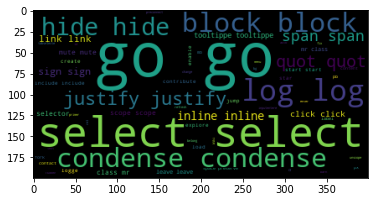

In [23]:
#@markdown 📌 High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2)) 
plt.imshow(wc)


## ⛅ ⛅The following codes will provide you POS options such as NOUN, ADJ, ADV. 

## 📎 Select POS you want. 

128
      POS                    Word  Freq
932   ADJ                    flex   216
648   ADJ                    main    53
871   ADJ                relative    46
84    ADJ                    meta    34
1184  ADJ                      no    34
...   ...                     ...   ...
2658  ADJ                id="site     1
2659  ADJ                      lh     1
2673  ADJ                  bottom     1
2680  ADJ             label="copy     1
2681  ADJ  class="clipboardbutton     1

[128 rows x 3 columns]


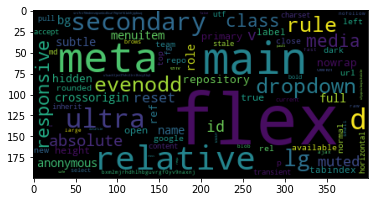

In [25]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

## ⛅ ⛅ I don't like the background in black. I want it WHITE!!! ⛄⚡

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

109


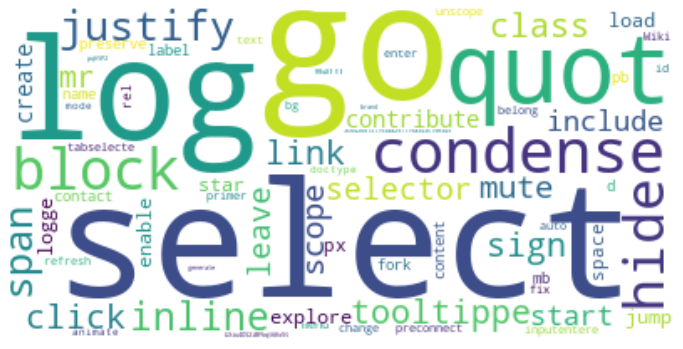

In [27]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')

##Pre-processing (사전처리)
- 코퍼스 분석을 하려면 분석하려는 텍스트의 단어를 토큰화하여 분석할 수 있는 형태로 준비해 놓아야 한다. i) tokenize 함수를 사용하여 토큰을 리스트화 하여 준비해 놓을 수도 있고, ii) tag 함수를 사용하여 토큰에 문법범주(품사)를 연결해서 준비해 놓을 수도 있다.  
-- [코드문법1] corpus_toolkit패키지에서 corpus_tools모듈을 ct로 줄여서 불러들여라.
-- [코드문법2] [파일 올리고 읽기] ct모듈의 ldcorpus( )함수에 brwon_single 데이터 폴더를 인자로 넣어, 그 결과를 brown_corp변수에 할당한다.
-- [코드문법3] [단어 토큰화] ct모듈의 tokenize( )함수 인자로 바로 위 코드 변수 brown_corp를 넣어, 그 결과를 tok_corp변수에 할당한다.
-- [코드문법4] [토큰화한 단어 빈도수] ct모듈의 frequency( )함수 인자로 바로 위 코드 변수 tok_corp를 넣어, 그 결과를 brown_freq변수에 할당한다.
-- [코드문법5] ct모듈의 head( )에 brown_freq변수를 첫 째 인자로, 빈도수가 높은 것 10개를 둘 째 인자로 사용해서, 상위 10개 토큰의 빈도수를 출력한다.

### Colab 작업 디렉토리에서 폴더를 생성하여 다른 곳에서 다운로드 받은 단/복수의 파일을 옮겨 넣는 방법 
- 코랩에 기본으로 깔려 있는 sample_data 에 커서를 대면 활성화되면서 우측에 세로 점 3 개가 나타난다. 거기를 클릭하면 선택사항 -> new folder를 클릭한다. 
- new folder를 drag해서 sample_data 쪽으로 끌어오면 같은 레벨로 폴더가 이동한다. 
- new folder에 커서를 대면 활성화되면서 우측에 세로 점 3 개가 나타난다.Rename folder 클릭해서 파일명을 새이름으로 바꾼다. 예)brown_single
- 해당 폴더에 커서를 대면 활성화되면서 우측에 세로 점 3 개가 나타난다.Upload 클릭해서 본인 컴퓨터에 다운로드 받은 복수의 파일을 모두 업로드 한다. 

In [ ]:
from corpus_toolkit import corpus_tools as ct
brown_corp = ct.ldcorpus("brown_single") #load and read corpus: ca~cd from brown_single original folder for class use
tok_corp = ct.tokenize(brown_corp) #tokenize corpus - by default this lemmatizes as well
brown_freq = ct.frequency(tok_corp) #creates a frequency dictionary
##note that range can be calculated instead of frequency using the argument calc = "range"
ct.head(brown_freq, hits = 10) #print top 10 items

## 명령어 차곡히 쌓기 (Nest) 
위에서 파일을 로드해서 읽고 -> 토큰화 하고 -> 토큰의 빈도수를 계산하는 명령어를 사용하여 코드로 작성했다. 아래 코드와 같이 모듈.함수( )인 명령어를 차곡차곡 쌓아서 같은 목적을 달성할 수 있고 이를 추천한다. 

In [ ]:
brown_freq = ct.frequency(ct.tokenize(ct.ldcorpus("brown_single")))
ct.head(brown_freq, hits = 10)

In [ ]:
conc_results1 = ct.concord(ct.tokenize(ct.ldcorpus("brown_single"),lemma = False),["run","ran","running","runs"],nhits = 10)
for x in conc_results1:
	print(x)

In [ ]:
conc_results2 = ct.concord(ct.tokenize(ct.ldcorpus("brown_single"),lemma = False),["run","ran","running","runs"],collocates = ["suddenly", 'just'], nhits = 10)
for x in conc_results2:
	print(x)

In [ ]:
collocates = ct.collocator(ct.tokenize(ct.ldcorpus("brown_single")),"go",stat = "MI")
#stat options include: "MI", "T", "freq", "left", and "right"

ct.head(collocates, hits = 10)

##N-grams
N-grams are contiguous sequences of n words. The tokenize() function can be used to create an n-gram version of a corpus by employing the ngram argument. By default, words in an n-gram are separated by two underscores "__"

In [ ]:
trigramfreq = ct.frequency(ct.tokenize(ct.ldcorpus("brown_single"),lemma = False, ngram = 3))
ct.head(trigramfreq, hits = 10)